# ****Exploring Dimensionality Reduction Methods for Face Mask Detection****
### **Lab 2: Exploring Image Data**

*Sammy Perez*<br>
*Reese Mellor*<br>
*Kenny Zhang* <br><br>
*CS5324 Fall 2023* <br>
*Professor: Ginger Alford*

## **1. Business Understanding**
***


When COVID-19 struck the world in 2020, face masks became one of the most prominent means of protection from the airborne disease and the usage of them was considered vital to public safety. Our dataset consists of facial images split into two separate categories: those with masks and those without. The non masked images were taken the CelebFace dataset by Jessica Li, while the masked images were scraped from Google Images. Our data was collected in the hopes of assisting in the creation of autonomous systems that can detect masks. To be considered efficient and beneficial, our prediction algorithm should be better than random chance (50% in this case).

With the increase of facial recognition software in everyday technologies, this algorithm and information collected could affect many pieces of the global society. Technology companies, such as Apple and Microsoft, have begun to use facial recognition software in items like cellphones and tablets. It is essential that algorithms can detect if masks are being worn quickly to decrease run time. Meanwhile, governments may use cameras to collect data for this algorithm to determine if all laws are followed during future global pandemics. Thousands of Americans disregarded the mask mandate, placing others in danger and creating many moments of public disturbance. The facial recognition feature can help authority figures know which areas are and are not following legislation passed for protection, which may later grant access to a better understanding for why disease upticks peaked in speciifc places.

Question of Interest: Is someone wearing a mask or not?

## **2. Data Preparation**
***

### **2.1 Reading and Linearizing Data**

In [1]:
# Import packages
import numpy as np                # for efficient numerical computations
import pandas as pd               # for DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import Image as IPImage, display
import os

imgMask = []
imgNoMask = []
dirMask = 'data/Face Mask Dataset/Train/WithMask'
dirNoMask = 'data/Face Mask Dataset/Train/WithoutMask'

h=100
w=100

def read_dir(directory, image_list):
    for filename in os.listdir(directory):
        if filename.endswith(('.jpg', '.png', '.jpeg', '.gif')):
            image_path = os.path.join(directory, filename)
            image = Image.open(image_path)
            image = image.resize((h,w))
            image = image.convert('L')
            image_array = np.array(image).flatten()
            image_list.append(image_array)

print("Reading mask data")
%time read_dir(dirMask, imgMask);
print("Finished reading mask dataset")

print("Reading no mask data")
%time read_dir(dirNoMask, imgNoMask);
print("Finished reading no mask dataset")

n_samples = len(imgMask)
n_features = len(imgMask[0])

print("n_samples: {}".format(n_samples))
print("n_features: {}".format(n_features))
print("Original Image Sizes {} by {}".format(h,w))

Reading mask data
CPU times: total: 6.66 s
Wall time: 6.66 s
Finished reading mask dataset
Reading no mask data
CPU times: total: 3.16 s
Wall time: 3.2 s
Finished reading no mask dataset
n_samples: 5000
n_features: 10000
Original Image Sizes 100 by 100


The image data was organized into two directories for masked and unmasked individuals. Each directory is 5000 images large. Image data was resized to be 100px in width and length for consistency easier comparison. All images in the dataset were square, meaning that the image's aspect ratio was preserved after the resizing. This also means that each image has 100000 features. These images have been converted to grayscale to reduce dimensionality and aid in ease of analysis. Image arrays were then flattened so that each row is one image.

### **2.2 Data Visualization**

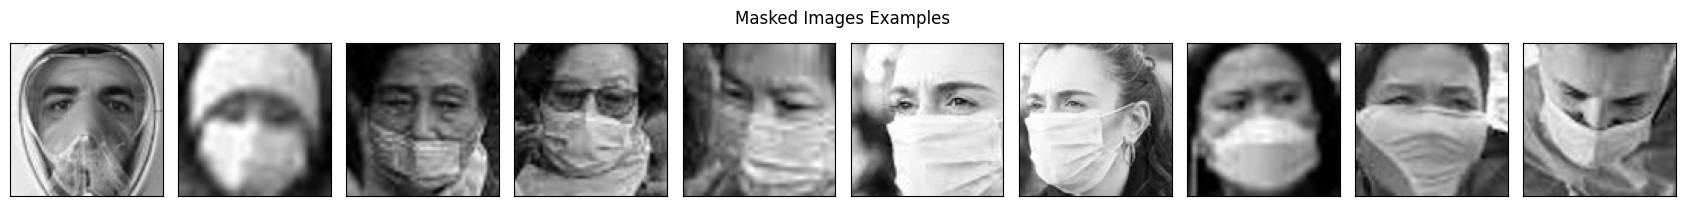

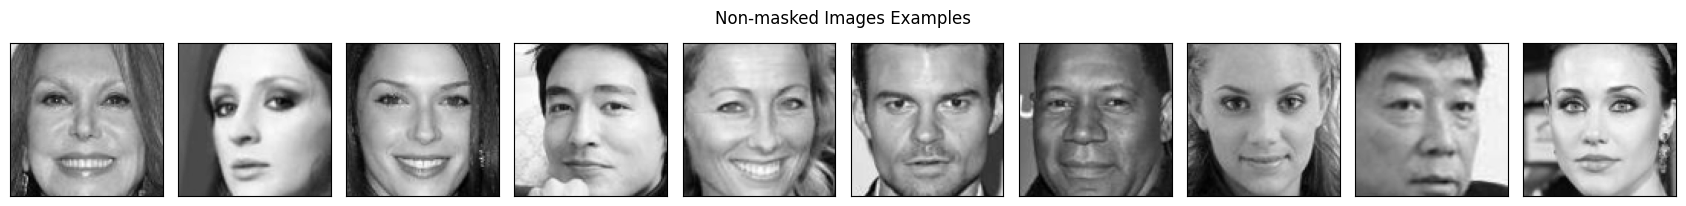

In [2]:
maskImages = []
noMaskImages = []

imgRange = 10

for x in range(imgRange) :
    maskImages.append(imgMask[x])

for x in range(imgRange) :
    noMaskImages.append(imgNoMask[x])

#print (len(imgMask))

# a helper plotting function
def plot_gallery(images, titles, h, w, n_row=3, n_col=6, title=''):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.7 * n_col, 2.3 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, wspace = .1, hspace=0)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        if (titles) :
            plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())
    if (titles): y=1
    else: y=0.93
    plt.suptitle(title, y=y)

plot_gallery(maskImages, [], h, w, 1, imgRange, 'Masked Images Examples')
plot_gallery(noMaskImages, [], h, w, 1, imgRange, 'Non-masked Images Examples')

Here are visualizations of some of the images in the dataset. As can be seen in the 6th and 7th image, some of the masked photos are augmented versions of existing photos. This means that they are existing images that were transformed through rotation, scaling, brightening, and other techniques. These images are also, in general, much lower quality than our non-masked images. I assume this was done due to technical or logistical limitations on the creator of this dataset, as well as celebrities having higher quality images due to media coverage. Our masked dataset has more than 1000 non-augmented faces and is diverse enough for our purposes. These augmented images were kept as they will be useful in training our algorithm and simulates the diverse conditions our algorithm may be forced to perform in.

## **3. Data Reduction**
***

### **3.1 Linear Dimensionality Reduction (PCA)**

#### **3.1.1 Plotting Explained Variance**

In [3]:
from sklearn.decomposition import PCA

n_components = 300
print ("Extracting the top %d eigenfaces from %d faces" % (n_components, len(imgMask)))
pca1 = PCA(n_components=n_components)
%time pca1.fit(imgMask.copy())

print ("Extracting the top %d eigenfaces from %d faces" % (n_components, len(imgNoMask)))
pca2 = PCA(n_components=n_components)
%time pca2.fit(imgNoMask.copy())

Extracting the top 300 eigenfaces from 5000 faces
CPU times: total: 51 s
Wall time: 4.46 s
Extracting the top 300 eigenfaces from 5000 faces
CPU times: total: 45.9 s
Wall time: 4.09 s


PCA(n_components=300)

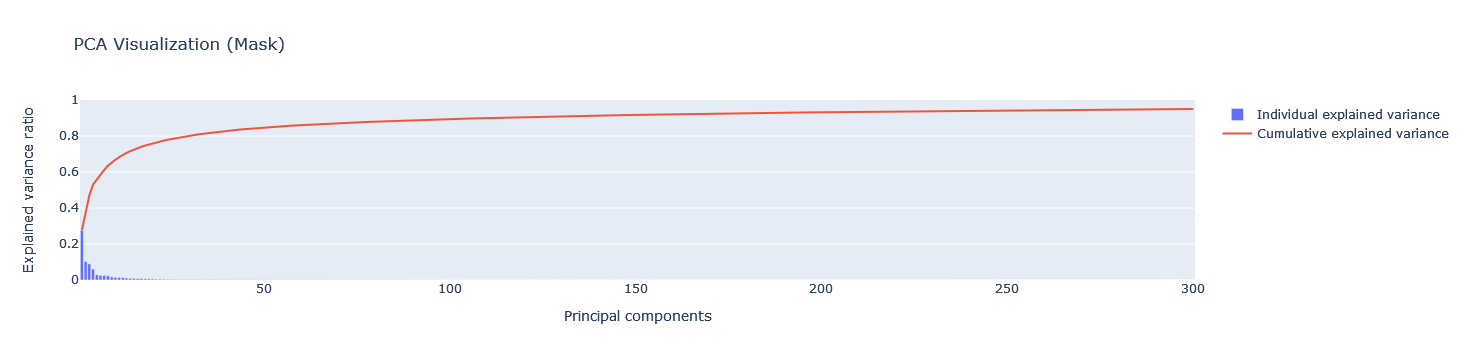

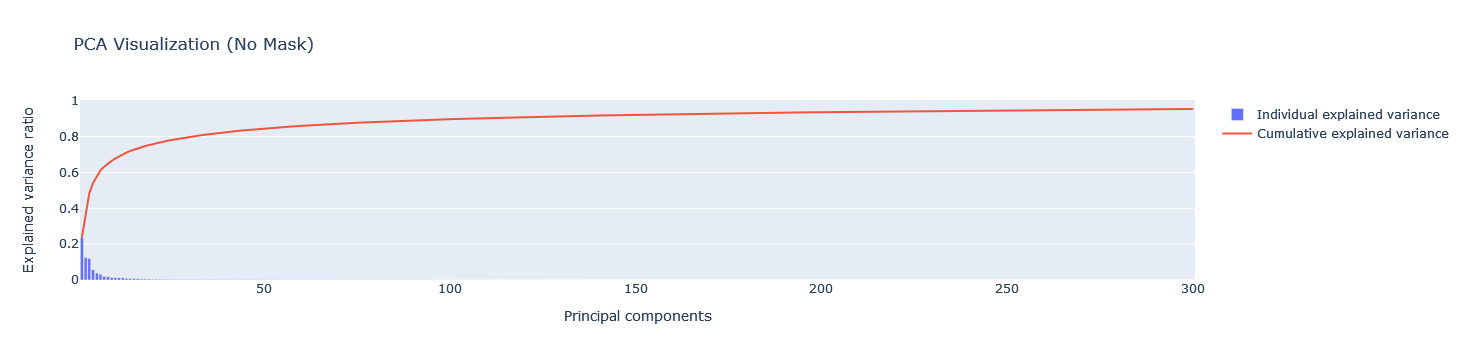

In [4]:
import plotly.express as px
import plotly.graph_objs as go

def plot_explained_variance(pca, title):
    explained_var = pca.explained_variance_ratio_
    cum_var_exp = np.cumsum(explained_var)
    
    fig = go.Figure()
    fig.add_trace(go.Bar(x=np.arange(1, len(explained_var) + 1), y=explained_var, name='Individual explained variance'))
    fig.add_trace(go.Scatter(x=np.arange(1, len(cum_var_exp) + 1), y=cum_var_exp, mode='lines', name='Cumulative explained variance'))
    fig.update_layout(title=title, xaxis_title='Principal components', yaxis_title='Explained variance ratio')
    
    fig.show()

plot_explained_variance(pca1, 'PCA Visualization (Mask)')
plot_explained_variance(pca2, 'PCA Visualization (No Mask)')

As shown by the graphs above, 300 is close to the minimum components needed to have a cumulative explained variance of 95% for both the masked and unmasked datasets for PCA. Specifically 298 components for the masked data and 271 components for the maskless data. This difference between components needed is likely due to differences in quality of these image sets, as discussed earlier. These faces took 55 seconds to extract features for the masked data and 50 seconds for the maskless data.

We believe that 95% is a good measure of how much of our original image should be represented by after dimensionality reduction. It captures a majority of the important values while still reducing dimensionality. While 99% is also a good threshold, we decided to go with 95% due to computational/technological limitations.

#### **3.1.2 Eigenfaces**

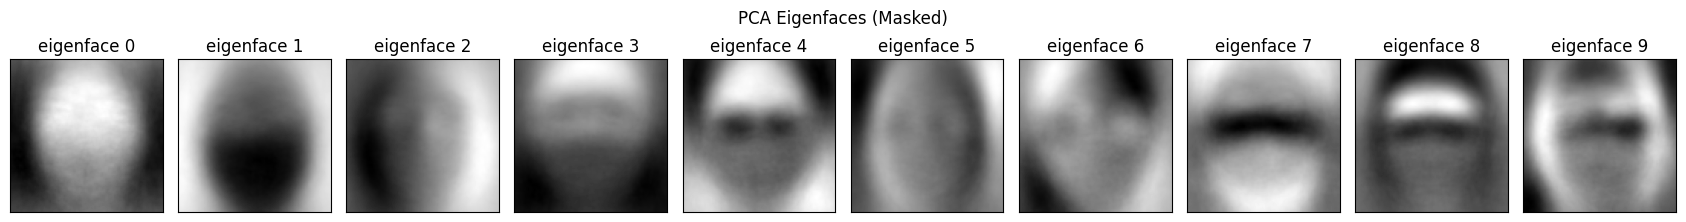

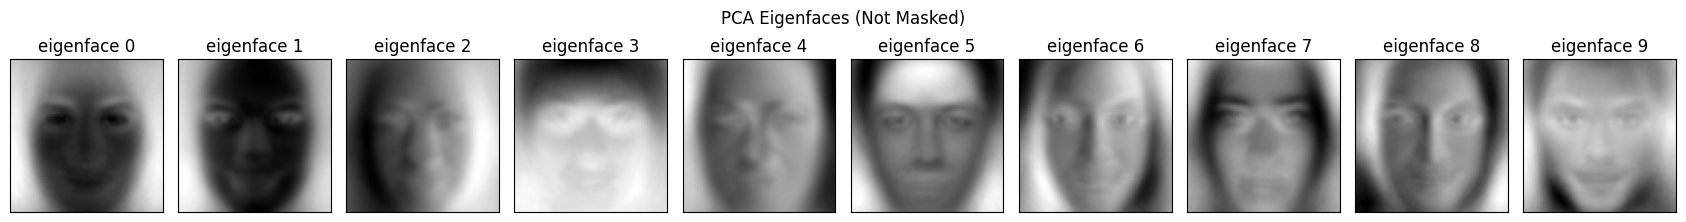

In [5]:
eigenfacesMaskPCA = pca1.components_.reshape((n_components, h, w))
eigenfacesNoMaskPCA = pca2.components_.reshape((n_components, h, w))

eigenface_titles = ["eigenface %d" % i for i in range(eigenfacesMaskPCA.shape[0])]

plot_gallery(eigenfacesMaskPCA, eigenface_titles, h, w, 1, 10, title='PCA Eigenfaces (Masked)')
plot_gallery(eigenfacesNoMaskPCA, eigenface_titles, h, w, 1, 10, title='PCA Eigenfaces (Not Masked)')

Here is a visualization of the eigenfaces extracted from our data. While not very well defined, the masked eigenfaces clearly seperates the mask and eyes. Our unmasked eigenfaces are much more detailed than our masked ones. This is, again, due to differences in quality, but also due to masks obscuring facial features, reducing the features that can be measured by these eigenfaces. 

#### **3.1.3 Image Reconstruction with PCA**

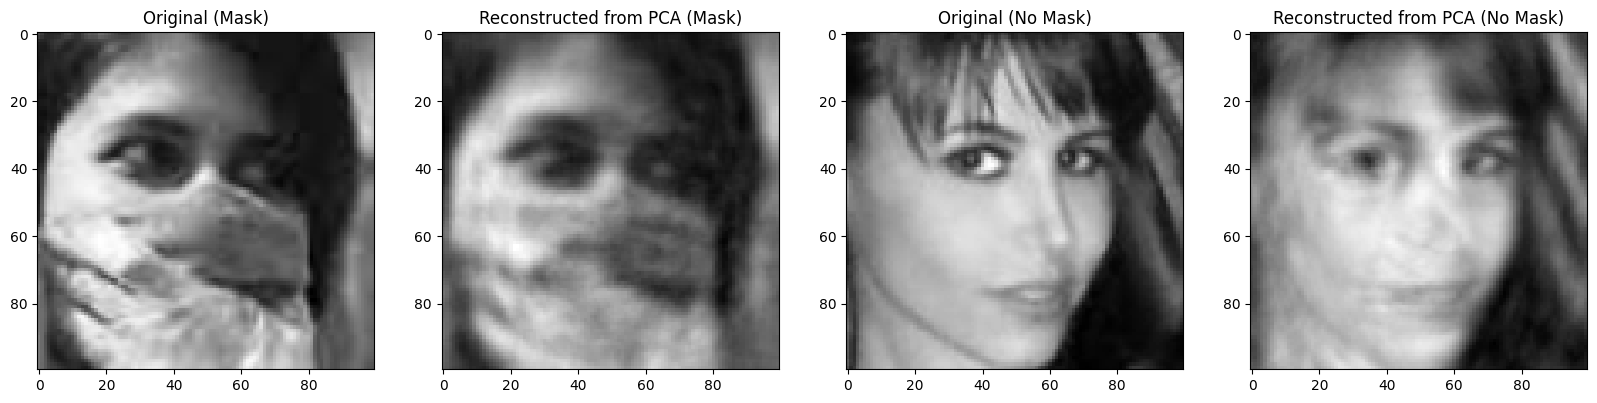

In [6]:
import matplotlib.gridspec as gridspec

def reconstruct_image(trans_obj,org_features):
    low_rep = trans_obj.transform(org_features)
    rec_image = trans_obj.inverse_transform(low_rep)
    return low_rep, rec_image
    
idx_to_reconstruct = 20
image_idx = imgMask[idx_to_reconstruct]
low_dimensional_representation, reconstructed_image_pca = reconstruct_image(pca1,image_idx.reshape(1, -1))

imageNM_idx = imgNoMask[idx_to_reconstruct]
low_dimensional_representation, reconstructed_image_nm_pca = reconstruct_image(pca2,imageNM_idx.reshape(1, -1))

plt.figure(figsize=(20,6))
plt.subplot(1,4,1)
plt.imshow(image_idx.reshape((h, w)), cmap=plt.cm.gray)
plt.title('Original (Mask)')
plt.grid(False)
plt.subplot(1,4,2)
plt.imshow(reconstructed_image_pca.reshape((h, w)), cmap=plt.cm.gray)
plt.title('Reconstructed from PCA (Mask)')
plt.grid(False)
plt.subplot(1,4,3)
plt.imshow(imageNM_idx.reshape((h, w)), cmap=plt.cm.gray)
plt.title('Original (No Mask)')
plt.grid(False)
plt.subplot(1,4,4)
plt.imshow(reconstructed_image_nm_pca.reshape((h, w)), cmap=plt.cm.gray)
plt.title('Reconstructed from PCA (No Mask)')
plt.grid(False)

Here are comparisons between the original photo and their reconstruction from PCA for both the masked and unmasked photos. While the reconstructions clearly lose a lot in quality, the overall structure and facial features of the original are still preserved while reducing dimensionality exponentially. I would consider PCA to be successful and could be a potential method for the construction of our algorithm.

### **3.2 Linear Dimensionality Reduction (RPCA)**

#### **3.2.1 Plotting Explained Variance**

In [7]:
from sklearn.decomposition import PCA

print ("Extracting the top %d eigenfaces from %d faces" % (n_components, len(imgMask)))
rpca1 = PCA(n_components=n_components, svd_solver='randomized')
%time rpca1.fit(imgMask.copy())

print ("Extracting the top %d eigenfaces from %d faces" % (n_components, len(imgNoMask)))
rpca2 = PCA(n_components=n_components, svd_solver='randomized')
%time rpca2.fit(imgNoMask.copy())

Extracting the top 300 eigenfaces from 5000 faces
CPU times: total: 53.6 s
Wall time: 4.59 s
Extracting the top 300 eigenfaces from 5000 faces
CPU times: total: 47.5 s
Wall time: 4.05 s


PCA(n_components=300, svd_solver='randomized')

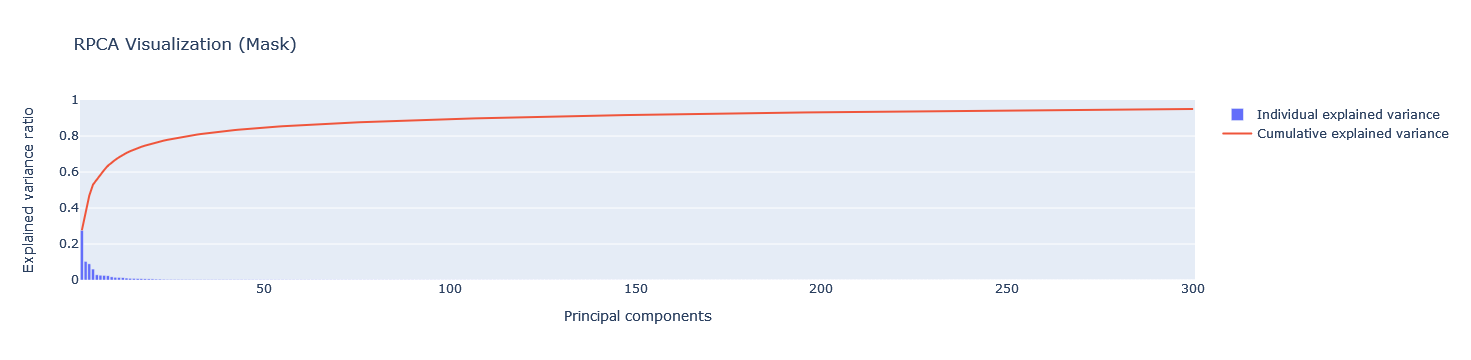

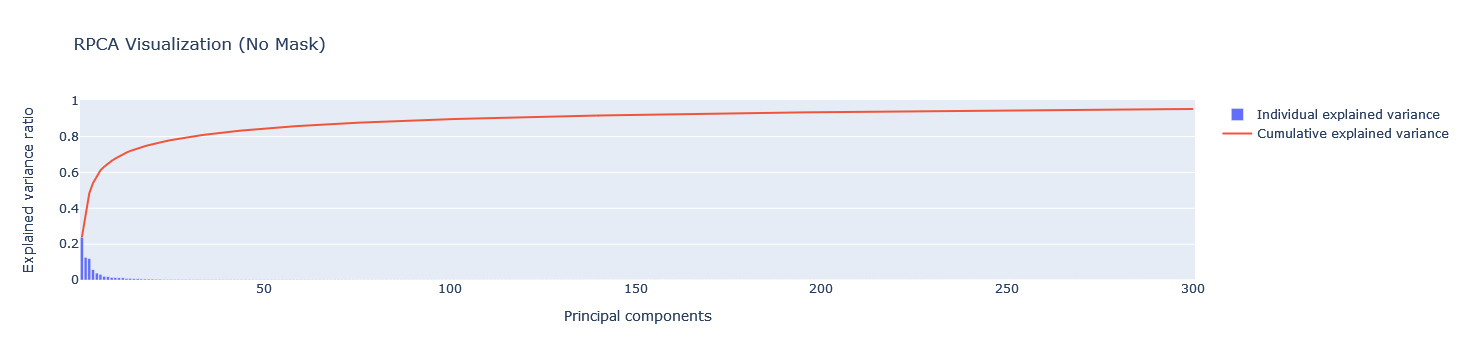

In [8]:
plot_explained_variance(rpca1, 'RPCA Visualization (Mask)')
plot_explained_variance(rpca2, 'RPCA Visualization (No Mask)')

As shown by the graphs above, 300 is close to the minimum components needed to have a cumulative explained variance of 95%. Specifically 298 components for the masked data and 271 components for the maskless data. Exactly the same amount of components as normal PCA.

These faces took 58 seconds to extract features for the masked data and 52 seconds for the maskless data.

#### **3.2.2 Eigenfaces**

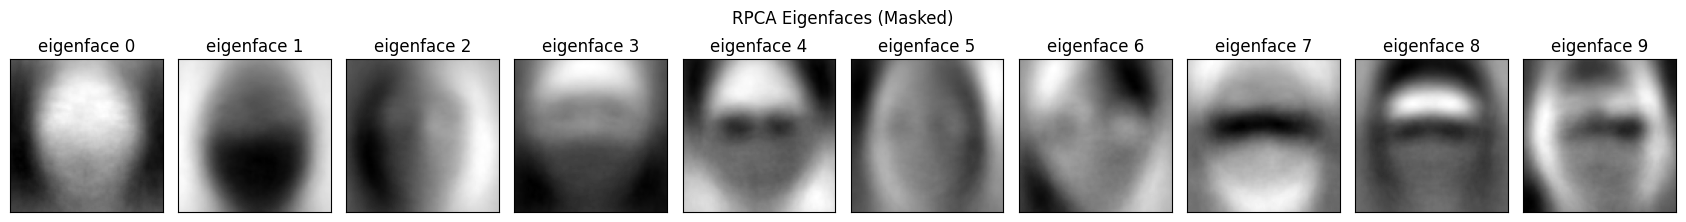

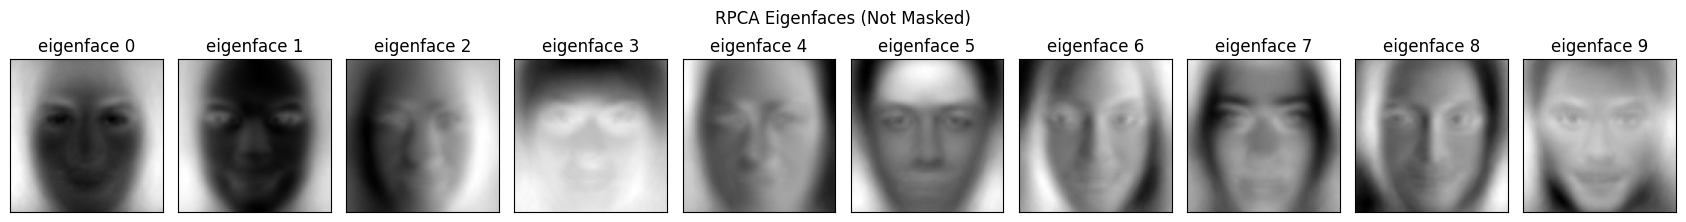

In [9]:
eigenfacesMaskRPCA = rpca1.components_.reshape((n_components, h, w))
eigenfacesNoMaskRPCA = rpca2.components_.reshape((n_components, h, w))

eigenface_titles = ["eigenface %d" % i for i in range(eigenfacesMaskRPCA.shape[0])]
plot_gallery(eigenfacesMaskRPCA, eigenface_titles, h, w, 1, 10, title='RPCA Eigenfaces (Masked)')
plot_gallery(eigenfacesNoMaskRPCA, eigenface_titles, h, w, 1, 10, title='RPCA Eigenfaces (Not Masked)')

#### **3.2.3 Image Reconstruction with RPCA**

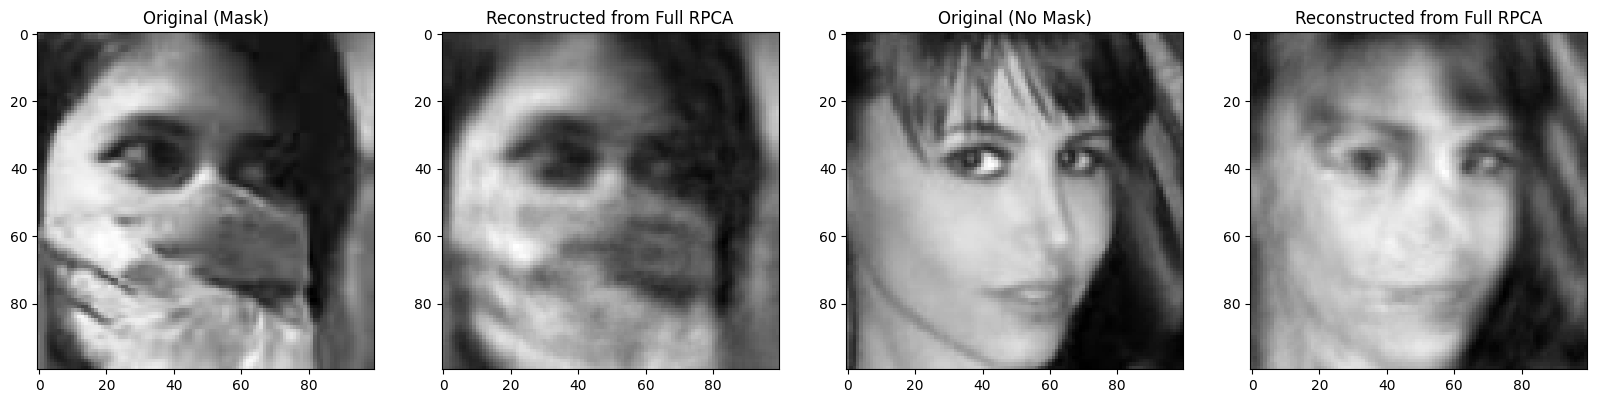

In [10]:
idx_to_reconstruct = 20 
image_idx = imgMask[idx_to_reconstruct]
low_dimensional_representation, reconstructed_image_rpca = reconstruct_image(rpca1,image_idx.reshape(1, -1))

imageNM_idx = imgNoMask[idx_to_reconstruct]
low_dimensional_representation_nm, reconstructed_image_nm_rpca = reconstruct_image(rpca2,imageNM_idx.reshape(1, -1))

plt.figure(figsize=(20,6))
plt.subplot(1,4,1)
plt.imshow(image_idx.reshape((h, w)), cmap=plt.cm.gray)
plt.title('Original (Mask)')
plt.grid(False)
plt.subplot(1,4,2)
plt.imshow(reconstructed_image_rpca.reshape((h, w)), cmap=plt.cm.gray)
plt.title('Reconstructed from Full RPCA')
plt.grid(False)
plt.subplot(1,4,3)
plt.imshow(imageNM_idx.reshape((h, w)), cmap=plt.cm.gray)
plt.title('Original (No Mask)')
plt.grid(False)
plt.subplot(1,4,4)
plt.imshow(reconstructed_image_nm_rpca.reshape((h, w)), cmap=plt.cm.gray)
plt.title('Reconstructed from Full RPCA')
plt.grid(False)

Here are comparisons between the original photo and their reconstruction from RPCA for both the masked and unmasked photos. Like PCA, the overall structure and facial features of the original are still preserved while reducing dimensionality exponentially. Visually, they look similar, sharing the same artifacts that PCA has. I would consider RPCA to be as successful as PCA and could be a contender for the dimensionality reduction technique we use.

### **3.3 Comparing Dimensionality Reduction Methods**

#### **3.3.1 Visually Comparing Methods**

In [11]:
def plt_reconstruct(idx_to_reconstruct, mask=False):
    idx_to_reconstruct = np.round(idx_to_reconstruct)

    if mask :
        x_flat = imgMask[idx_to_reconstruct].reshape(1, -1)
        reconstructed_image = pca1.inverse_transform(pca1.transform(x_flat.copy()))    
        reconstructed_image_rpca = rpca1.inverse_transform(rpca1.transform(x_flat.copy()))
    else :
        x_flat = imgNoMask[idx_to_reconstruct].reshape(1, -1)
        reconstructed_image = pca2.inverse_transform(pca2.transform(x_flat.copy()))    
        reconstructed_image_rpca = rpca2.inverse_transform(rpca2.transform(x_flat.copy()))
    
    plt.figure(figsize=(15,7))
    
    plt.subplot(1,3,1) # original
    plt.imshow(x_flat.reshape((h, w)), cmap=plt.cm.gray)
    plt.title("Original Image"+f", {x_flat.shape[1]} elements")
    plt.grid(False)
    
    plt.subplot(1,3,2) # pca
    plt.imshow(reconstructed_image.reshape((h, w)), cmap=plt.cm.gray)
    plt.title(f"PCA, {n_components} elements")
    plt.grid(False)
    
    plt.subplot(1,3,3) # randomized pca
    plt.imshow(reconstructed_image_rpca.reshape((h, w)), cmap=plt.cm.gray)
    plt.title(f"Randomized PCA, {n_components} elements")
    plt.grid(False)
    plt.show()
    
from ipywidgets import widgets
widgets.interact(plt_reconstruct,idx_to_reconstruct=(0,n_samples-1,1), mask=False,__manual=True)

interactive(children=(IntSlider(value=2499, description='idx_to_reconstruct', max=4999), Checkbox(value=False,…

<function __main__.plt_reconstruct(idx_to_reconstruct, mask=False)>

Here, we can visually compare PCA and RPCA side by side. With the interactive widget, readers can view photos between index 0 and 1499 and their PCA and RCPA recreations. When viewed visually, there is very little that stands out between PCA and RPCA image reconstruction. While we may not be able to perceive, perhaps we will be able to find a difference quantitatively.

#### **3.3.2 Quantitatively Comparing Dimensionality Methods**

In [12]:
from sklearn.metrics import mean_squared_error

def calculate_MSE_array(imgList, pca, mseList) :
    print('Calculating MSE for data list')
    for image in imgList:    
        low_dimensional_representation, reconstructed_image = reconstruct_image(pca,image.reshape(1, -1))
        mse = mean_squared_error(image.flatten(), reconstructed_image.flatten())
        mseList.append(mse)
    print('MSE values calcuations finished')

pca_mask_mse = []
%time calculate_MSE_array(imgMask[:1000], pca1, pca_mask_mse)

pca_nomask_mse = []
%time calculate_MSE_array(imgNoMask[:1000], pca2, pca_nomask_mse)

rpca_mask_mse = []
%time calculate_MSE_array(imgMask[:1000], rpca1, rpca_mask_mse)

rpca_nomask_mse = []
%time calculate_MSE_array(imgNoMask[:1000], rpca2, rpca_nomask_mse)

Calculating MSE for data list
MSE values calcuations finished
CPU times: total: 52.2 s
Wall time: 29 s
Calculating MSE for data list
MSE values calcuations finished
CPU times: total: 52.5 s
Wall time: 29 s
Calculating MSE for data list
MSE values calcuations finished
CPU times: total: 50.7 s
Wall time: 29.3 s
Calculating MSE for data list
MSE values calcuations finished
CPU times: total: 48.3 s
Wall time: 29.2 s


Here, we are calculating the mean squared error between the recreations of the photos and their original version. Since my computer took upwards of 30 minutes to calculate the MSE for all arrays, I have cut the calculations to just the first 1000 values of each dataset.

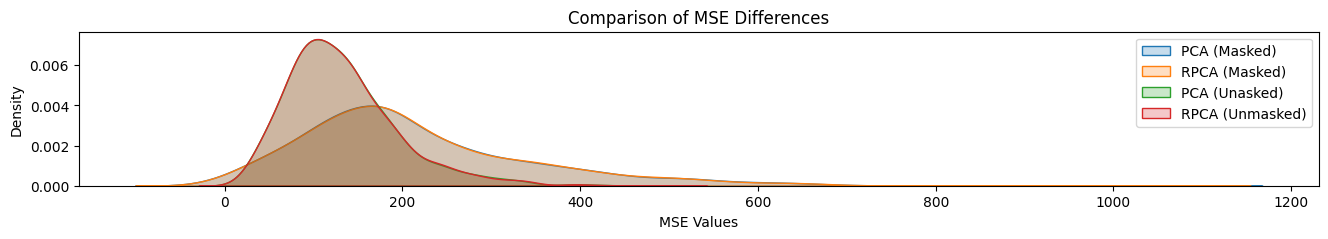

In [13]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

plt.figure(figsize=(16, 2))

sns.kdeplot(pca_mask_mse, label='PCA (Masked)', fill=True)
sns.kdeplot(rpca_mask_mse, label='RPCA (Masked)', fill=True)
sns.kdeplot(pca_nomask_mse, label='PCA (Unasked)', fill=True)
sns.kdeplot(rpca_nomask_mse, label='RPCA (Unmasked)', fill=True)

plt.xlabel('MSE Values')
plt.ylabel('Density')
plt.title('Comparison of MSE Differences')
plt.legend()

plt.show()

In this graph, we are comparing the distribution of mean squared error (MSE) of PCA and RPCA for both the masked and unmasked datasets. The MSE of the analysis of the masked dataset has a range roughly between 0 and 1100, while the range of the unmasked dataset is roughly 0 to 500. The masked distribution is also much flatter than the unmasked distribution. This is likely due to images in the masked dataset being of generally lower pixel density before resizing than our unmasked dataset. Therefore, our methods have less information to work with in the masked datasets. Our view here makes it difficult to see the PCA lines, so let's try reframing our graph.

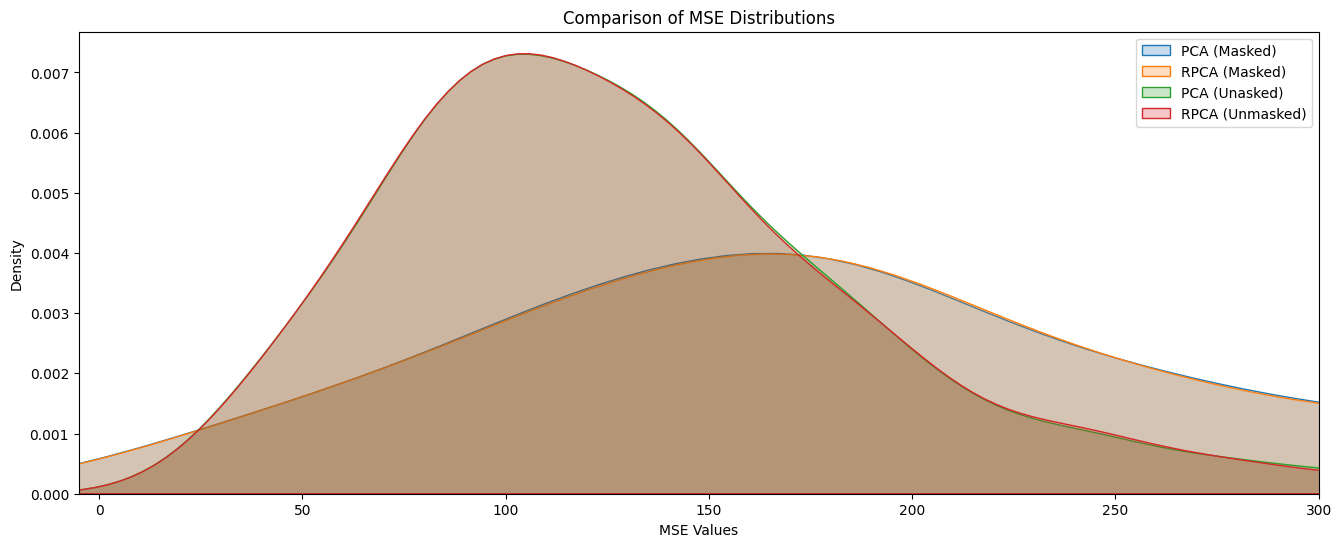

In [14]:
plt.figure(figsize=(16, 6))
plt.xlim(-5, 300)

sns.kdeplot(pca_mask_mse, label='PCA (Masked)', fill=True)
sns.kdeplot(rpca_mask_mse, label='RPCA (Masked)', fill=True)
sns.kdeplot(pca_nomask_mse, label='PCA (Unasked)', fill=True)
sns.kdeplot(rpca_nomask_mse, label='RPCA (Unmasked)', fill=True)

plt.xlabel('MSE Values')
plt.ylabel('Density')
plt.title('Comparison of MSE Distributions')
plt.legend()

plt.show()

In our reframed graph, I have limited the x-axis of our previous graph to be from 0 to 300. Here we can see that our PCA distributions align so closely with RPCA that they look like one line. Distributions here seem to be more closely aligned to the dataset than the analysis method. However, this could be due to the scale of the graphs so a more direct comparison may show a difference between the two methods.

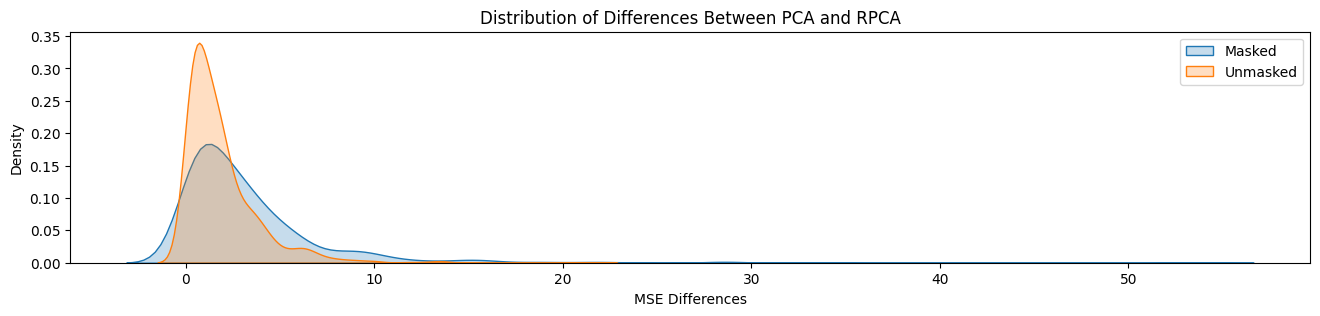

In [15]:
plt.figure(figsize=(16, 3))

difference_mask = [abs(x - y) for x, y in zip(pca_mask_mse, rpca_mask_mse)]
difference_nomask = [abs(x - y) for x, y in zip(pca_nomask_mse, rpca_nomask_mse)]

sns.kdeplot(difference_mask, fill=True, label='Masked')
sns.kdeplot(difference_nomask, fill=True, label='Unmasked')

plt.xlabel('MSE Differences')
plt.ylabel('Density')
plt.title('Distribution of Differences Between PCA and RPCA')
plt.legend()

plt.show()

For this chart, we can observe the distribution of differences between the MSE of PCA and RPCA. This gives us direct insight into how different PCA and RPCA are between our masked and unmasked datasets. With the whole graph here, we can see that a majority of the distribution is between 0 and 5. However, the masked dataset has range of up to roughly 40, while the unmasked dataset has a range up to 20. This is most likely influenced by dataset quality as discussed previously. Before we analyze the majority of values on the left side of the graph, let's enlarge our graph to focus on that.

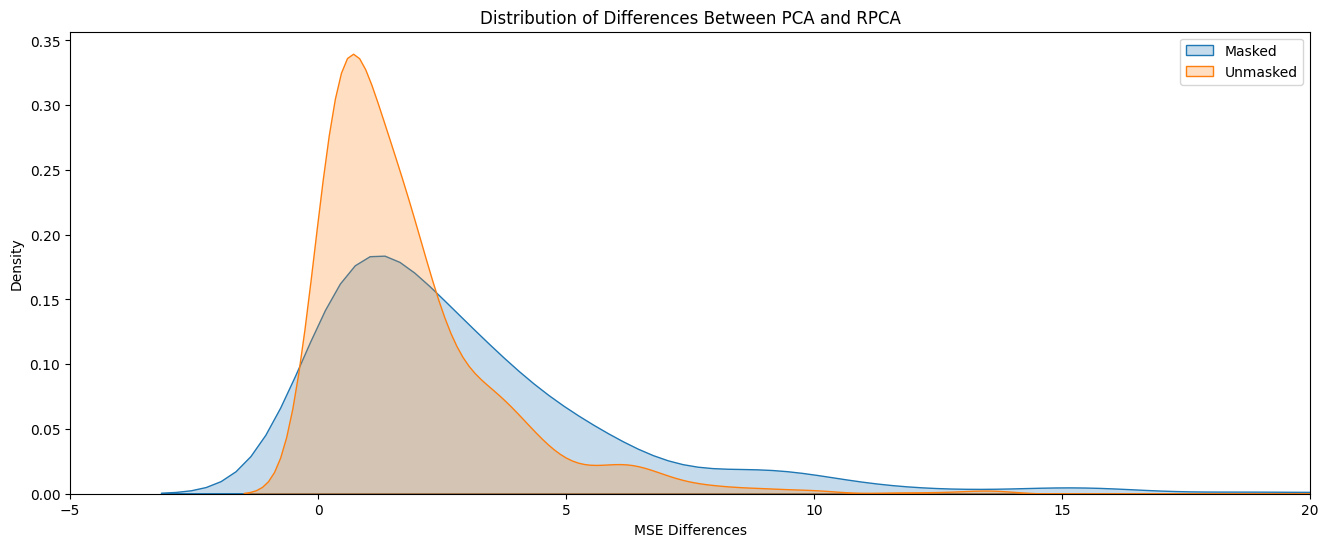

In [16]:
plt.figure(figsize=(16, 6))
plt.xlim(-5, 20)

sns.kdeplot(difference_mask, fill=True, label='Masked')
sns.kdeplot(difference_nomask, fill=True, label='Unmasked')

plt.xlabel('MSE Differences')
plt.ylabel('Density')
plt.title('Distribution of Differences Between PCA and RPCA')
plt.legend()

plt.show()

This is the same graph as before except that its x axis has been limited to -5 and 20. From the graph, we can see that both distributions are centered between 0 and 5. This shows that a majority of MSE in reconstructions from PCA were similar in magnitude to the MSE in RPCA reconstructions. From these two graphs we can conclude that there is not a substantial difference in recreation accuracy between PCA and RPCA. A comparison between the analysis times for PCA and RPCA found in sections 3.2.1 and 3.1.1 also do not show any significant difference. Because of these findings, both PCA and RPCA are equally valid methods for feature extraction for our purposes.

### **3.4 Feature Extraction with DAISY**

#### **3.4.1 Visualizing and Applying DAISY**

(4, 4, 52)
832


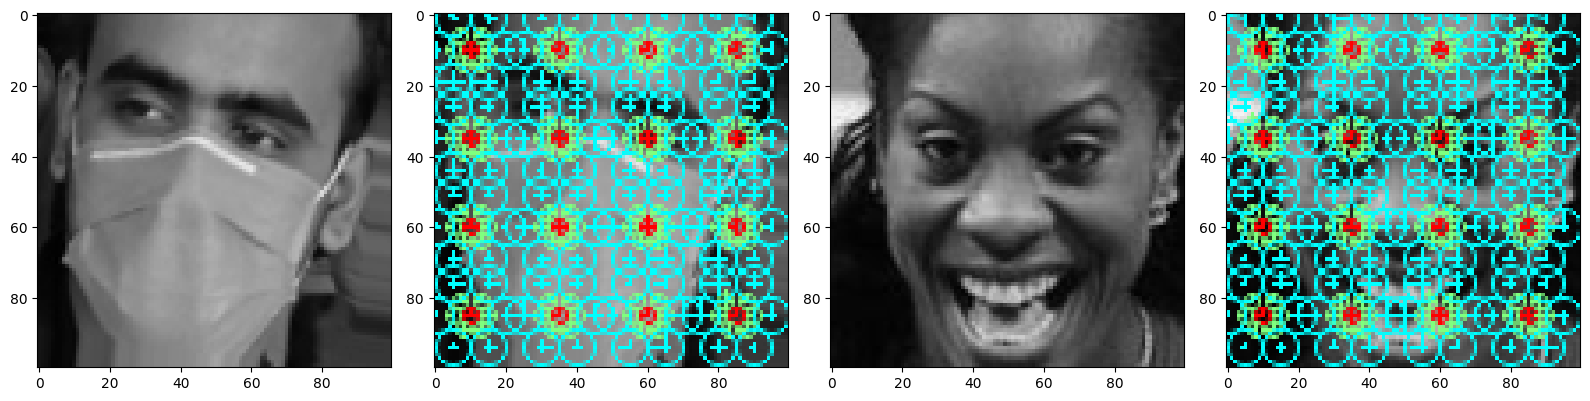

In [17]:
from skimage.io import imshow
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
from skimage.feature import daisy

plt.figure(figsize=(16, 5))
plt.subplot(1,4,1)
idx_to_reconstruct = 1984#int(np.random.rand(1)*len(imgMask)) #a good set is 1984
img  = imgMask[idx_to_reconstruct].reshape((h,w))
imshow(img)
plt.grid(False)

plt.subplot(1,4,2)
features, img_desc = daisy(img, step=25, radius=10, rings=2, 
                           histograms=6, orientations=4,
                           visualize=True)
imshow(img_desc)
plt.grid(False)

plt.subplot(1,4,3)
img  = imgNoMask[idx_to_reconstruct].reshape((h,w))
imshow(img)
plt.grid(False)


plt.subplot(1,4,4)
features, img_desc = daisy(img, step=25, radius=10, rings=2, 
                           histograms=6, orientations=4,
                           visualize=True)
imshow(img_desc)

print(features.shape)
print(features.shape[0]*features.shape[1]*features.shape[2])

plt.grid(False)
plt.show()

This is a visualization of DAISY image descriptors overlayed onto the original image. 16 DAISY descriptors are extracted from these images with a total amount of 832 valeus down from the original image's 10000. We chose this DAISY configuration as we felt it had the best coverage of the image while also not being too computationally inefficient to be impractical.

In [18]:
def apply_daisy(row,shape):
    feat = daisy(row.reshape(shape), step=25, radius=10, 
                 rings=2, histograms=6, orientations=4,
                 visualize=False)
    return feat.reshape((-1))

print("Applying DAISY for imgNoMask")
%time daisy_features_nm = np.apply_along_axis(apply_daisy, 1, imgNoMask, (h,w))
print(daisy_features_nm.shape)
print("Finished applying DAISY")

print("Applying DAISY for imgMask")
%time daisy_features_m = np.apply_along_axis(apply_daisy, 1, imgMask, (h,w))
print(daisy_features_m.shape)
print("Finished applying DAISY")

Applying DAISY for imgNoMask
CPU times: total: 19.1 s
Wall time: 19.1 s
(5000, 832)
Finished applying DAISY
Applying DAISY for imgMask
CPU times: total: 18.6 s
Wall time: 18.6 s
(5000, 832)
Finished applying DAISY


Here, we apply DAISY to every image in our two datasets.

#### **3.4.2 Feature Extraction Heatmap Comparison**

CPU times: total: 953 ms
Wall time: 263 ms
CPU times: total: 938 ms
Wall time: 262 ms
CPU times: total: 1.73 s
Wall time: 316 ms


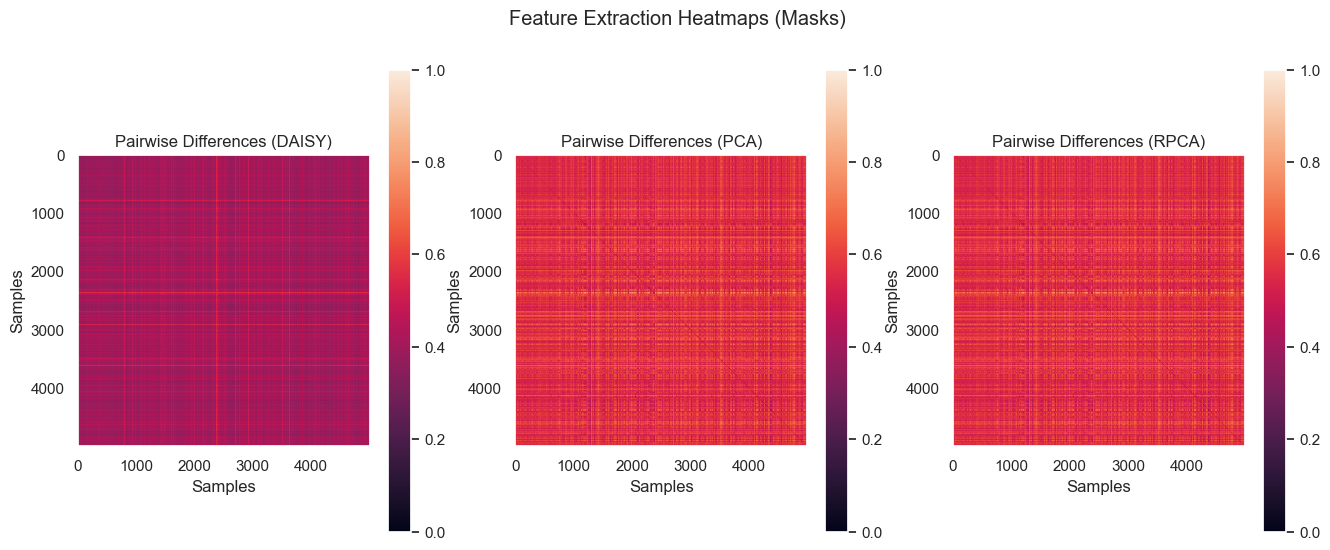

In [19]:
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.preprocessing import MinMaxScaler

principal_components = pca1.fit_transform(imgMask)
principal_components_r = rpca1.fit_transform(imgMask)
scaler = MinMaxScaler(feature_range=(0, 1))

%time pairwise_differences_m_pca_list = pairwise_distances(principal_components)

pairwise_differences_m_pca = np.array(pairwise_differences_m_pca_list)
pairwise_differences_m_pca = scaler.fit_transform(pairwise_differences_m_pca)

%time pairwise_differences_m_rpca_list = pairwise_distances(principal_components_r)

pairwise_differences_m_rpca = np.array(pairwise_differences_m_rpca_list)
pairwise_differences_m_rpca = scaler.fit_transform(pairwise_differences_m_rpca)

%time pairwise_differences_m = pairwise_distances(daisy_features_m)
pairwise_differences_m = scaler.fit_transform(pairwise_differences_m)

cmap = sns.set(style="darkgrid")

plt.figure(figsize=(16, 6))

plt.subplot(1, 3, 1)
plt.imshow(pairwise_differences_m, cmap=cmap)#, vmin=vmin, vmax=vmax)
plt.colorbar()
plt.grid(False)

plt.xlabel('Samples')
plt.ylabel('Samples')
plt.title('Pairwise Differences (DAISY)')

plt.subplot(1, 3, 2)
plt.imshow(pairwise_differences_m_pca, cmap=cmap)#, vmin=vmin, vmax=vmax)
plt.colorbar()
plt.grid(False)

plt.xlabel('Samples')
plt.ylabel('Samples')
plt.title('Pairwise Differences (PCA)')

plt.subplot(1, 3, 3)
plt.imshow(pairwise_differences_m_rpca, cmap=cmap)#, vmin=vmin, vmax=vmax)
plt.colorbar()
plt.grid(False)

plt.xlabel('Samples')
plt.ylabel('Samples')
plt.title('Pairwise Differences (RPCA)')

plt.suptitle('Feature Extraction Heatmaps (Masks)')
plt.show()

Using our DAISY descriptors obtained in section 3.4.1, we can construct a pairwise difference heatmap for our different analysis methods. We have scaled all values to fit between 1 and 0 for easier compariosn between heatmaps. As can be seen above, the heat maps for the PCA and RPCA are quite similar and no unique features between them. Both heatmaps have a texture similar to noise. A majority of its color is also within the upper half of the color spectrum, suggesting that the data points obtained by PCA and RPCA are very different to each other, generally having larger pairwise difference values. 

The DAISY heatmap, on the other hand, has datapoints that are mostly below 0.5 as shown by the color. This indicates that most features are considered similar to each other. However, there are distinct lines of data points. These may indicate features that are more important in identification than others. This shows that DAISY image analysis is much better at identifying important features than PCA and RPCA.

CPU times: total: 1.06 s
Wall time: 278 ms
CPU times: total: 906 ms
Wall time: 271 ms
CPU times: total: 1.7 s
Wall time: 314 ms


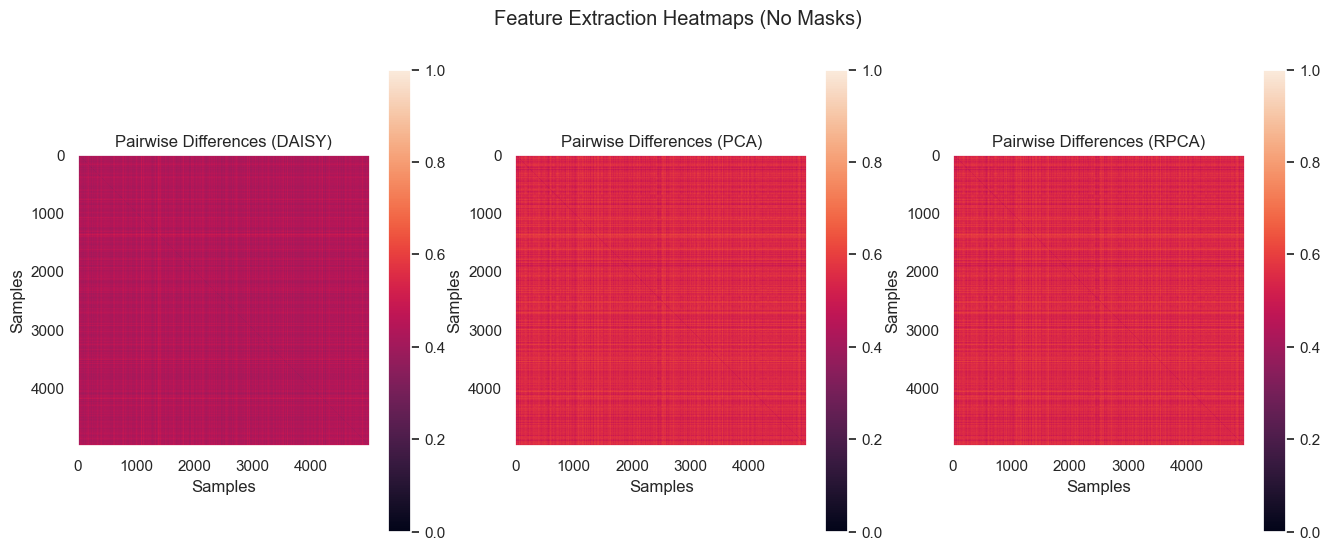

In [20]:
principal_components = pca2.fit_transform(imgNoMask)
principal_components_r = rpca2.fit_transform(imgNoMask)
scaler = MinMaxScaler(feature_range=(0, 1))

%time pairwise_differences_nm_pca_list = pairwise_distances(principal_components)

pairwise_differences_nm_pca = np.array(pairwise_differences_nm_pca_list)
pairwise_differences_nm_pca = scaler.fit_transform(pairwise_differences_nm_pca)

%time pairwise_differences_nm_rpca_list = pairwise_distances(principal_components_r)

pairwise_differences_nm_rpca = np.array(pairwise_differences_nm_rpca_list)
pairwise_differences_nm_rpca = scaler.fit_transform(pairwise_differences_nm_rpca)

%time pairwise_differences_nm = pairwise_distances(daisy_features_nm)
pairwise_differences_nm = scaler.fit_transform(pairwise_differences_nm)

plt.figure(figsize=(16, 6))
plt.subplot(1, 3, 1)
plt.imshow(pairwise_differences_nm, cmap=cmap)#, vmin=vmin, vmax=vmax)
plt.colorbar()
plt.grid(False)

plt.xlabel('Samples')
plt.ylabel('Samples')
plt.title('Pairwise Differences (DAISY)')

plt.subplot(1, 3, 2)
plt.imshow(pairwise_differences_nm_pca, cmap=cmap)#, vmin=vmin, vmax=vmax)
plt.colorbar()
plt.grid(False)

plt.xlabel('Samples')
plt.ylabel('Samples')
plt.title('Pairwise Differences (PCA)')

plt.subplot(1, 3, 3)
plt.imshow(pairwise_differences_nm_rpca, cmap=cmap)#, vmin=vmin, vmax=vmax)
plt.colorbar()
plt.grid(False)

plt.xlabel('Samples')
plt.ylabel('Samples')
plt.title('Pairwise Differences (RPCA)')

plt.suptitle('Feature Extraction Heatmaps (No Masks)')
plt.show()

Comparing pairwise difference heatmaps on the no masks dataset, there are a lot of differences in identifying distinct features between images. While most of our observations in the previous analysis still stand (general color of the graph, similarities between PCA and RPCA, noisy texture) the heatmap for DAISY has fewer and less distinct similar features. However, the lines are still identifiable as faint as they are.

The difference in "line strength" suggests that the difference in quality of our two datasets may be the cause of the previous DAISY heatmap's distinct lines. The mask dataset is less "clean" due to differences in image quality and less clear images with only the subject's face. However, since the mask dataset uses augmented images and the nonmask dataset does not, this should result in more similarity between datapoints, not less.

These inconsistencies cast doubt on the strength of our previous conclusions. However, we still believe that DAISY has potential for our prediction algorithm and could be useful given more research.

### **References**

Face mask detection ~12K Images Dataset. (2020, May 24). Kaggle. https://www.kaggle.com/datasets/ashishjangra27/face-mask-12k-images-dataset